In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, (1, 3)]
y = iris.target

# interesują nas tylko  dwie klasy, dlatego zaznaczamy sobie
# czy dany element należy do jednej z dwóch czy  nie
iris_type = (y == 0) | (y == 1)
X = X[iris_type]
y = y[iris_type]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    """
      Decision Boundary (granica decyzyjna) dla SVM wynosi
      w0*x0 + w1*x1 + b = 0

      Czyli jest to równanie suma(waga_cechy*wartość_cechy) dla wszystkich cech + bias
      Z tego równania mamy x0
    """
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margines = 1/w[1]
    górny_margines = decision_boundary + margines
    dolny_margines = decision_boundary - margines

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, górny_margines, "k--", linewidth=2)
    plt.plot(x0, dolny_margines, "k--", linewidth=2)

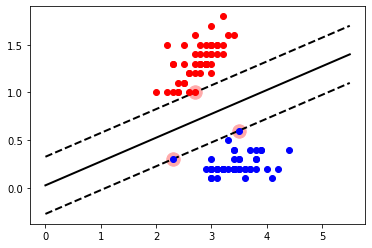

In [ ]:
# odkomentuj aby uzyskać wykres wielkości takiej jak na kursie
#plt.figure(figsize=(15,15))
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plt.show()

In [ ]:
#dane wejściowe
X = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
y = np.array([0, 0, 1, 1])

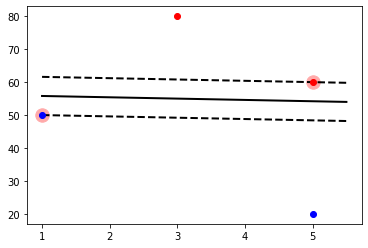

In [ ]:
# stworzenie klasyfikatora bez skalowania
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

plot_svc_decision_boundary(svm_clf, 1, 5.5)

# rysujemy punkty
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plt.show()

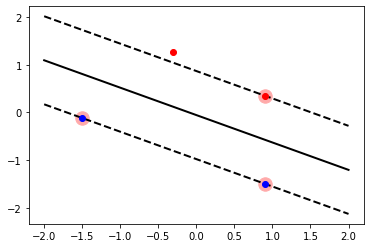

In [ ]:
# stworzenie klasyfikatora ze skalowanie

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# skalowanie. Nie możemy użyć PIpeline dlatego że musimy potem te punkty wyrysować
X_scaled = StandardScaler().fit_transform(X)
svm_clf = SVC(kernel="linear")

# szkolimy klasyfikator na przeskalowanych punktach
svm_clf.fit(X_scaled, y)

# rysujemy strefę buforową plus punkty przeskalowane
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.plot(X_scaled[:, 0][y==1], X_scaled[:, 1][y==1], "ro")
plt.plot(X_scaled[:, 0][y==0], X_scaled[:, 1][y==0], "bo")
plt.show()

In [ ]:
# NIemożliwa sytuacja

import numpy as np

iris = load_iris()
X = iris.data[:, (1, 3)]
y = iris.target

# dodwanie niebieskiego punktu wśród czerwonych
X = np.append(X, [[3.0, 1.75]], axis=0)
y = np.append(y, [[0]])

# interesują nas tylko  dwie klasy, dlatego zaznaczamy sobie
# czy dany element należy do jednej z dwóch czy  nie
iris_type = (y == 0) | (y == 1)
X = X[iris_type]
y = y[iris_type]

# SVM Classifier model
# sytuacja jest niemożliwa dlatego że wartość C jest nieskończonością ( baaaardzo duża ) co powoduje iż nie są dopuszczane żadne naruszenia strefy buforowej
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plt.show()

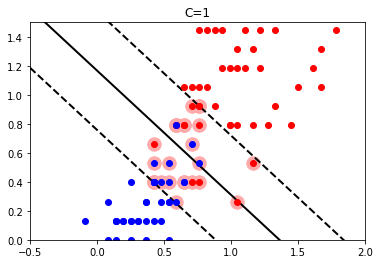

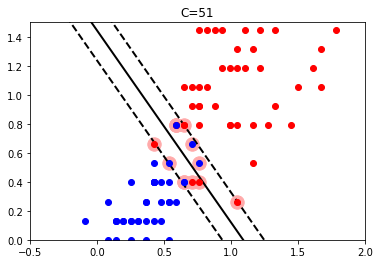

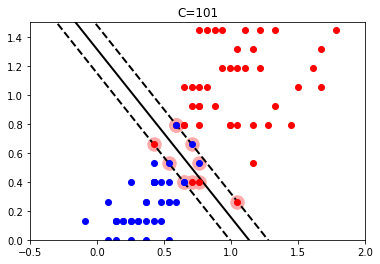

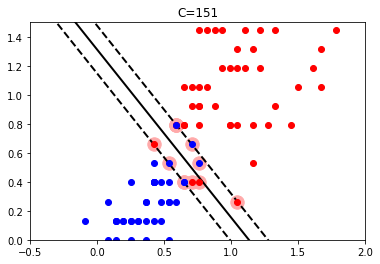

In [ ]:
# ładowanie zbioru iris
iris = load_iris()
X = iris["data"][:, (2, 3)] # interesują nas tylko 2 cehcy dla uproszcenia
y = (iris["target"] == 2).astype(np.float64) # chcemy mieć 2 klasy tylko klasa nr. 2 i pozostałe. DLaczego 2 dalczego by nie :)

X = StandardScaler().fit_transform(X)

for val_C in range(1, 152, 50):
  svm_clf = SVC(kernel="linear", C=val_C, random_state=10)
  svm_clf.fit(X, y)
  plot_svc_decision_boundary(svm_clf, -2, 2)
  # rysowanie klasy  jako czerowne kółka
  # klasy 0 jako niebieskie kółka
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
  # ograniczenie osi aby było lepiej widać
  plt.axis([-0.5, 2, 0, 1.5])
  plt.title("C="+str(val_C))
  plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# metoda do wyrysowania punktów
# jak ktoś chce może się zagłebić, ale nie jest to celem tego kursu
def plot_dataset(X_train, X_test, y_train, y_test, clf=None, plot_train=True, plot_test=True):

  # rysowanie zbioru danych  
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(1, 1, 1)
  if plot_test:
    ax.set_title("Test data")
    X = X_test
  else:
    ax.set_title("Train data")
    X = X_train
  
  # narysowanie siatki o odpowiednich rozmiarach
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                        np.arange(y_min, y_max, .02))
  
  # rysowanie decision boundary dla klsyfikatora
  if clf is not None:
    plot_colors = "bry"
    plot_step = 0.02
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

  # Rysowanie punktów treningowych
  if plot_train:
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired,
              edgecolors='k',)
  # Rysowanie punktów testowych - bardziej przezroczyste
  if plot_test:
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, alpha=0.9,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  return ax

score  0.778


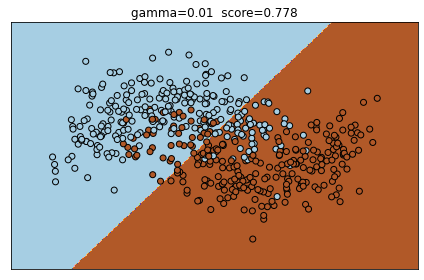

score  0.792


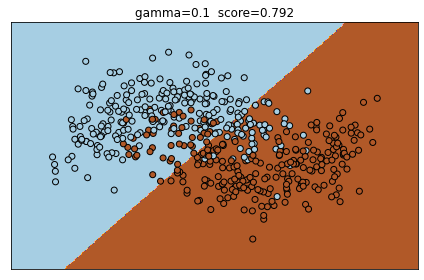

score  0.846


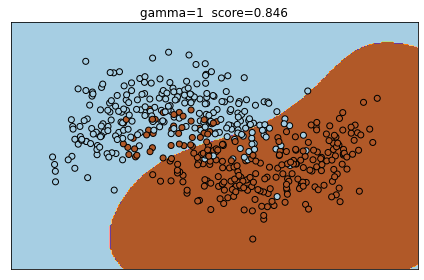

score  0.894


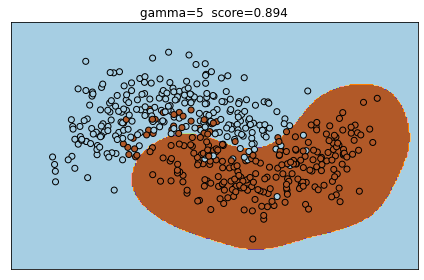

score  0.904


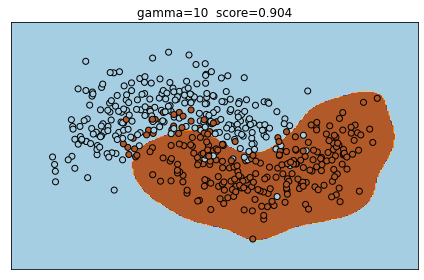

score  0.934


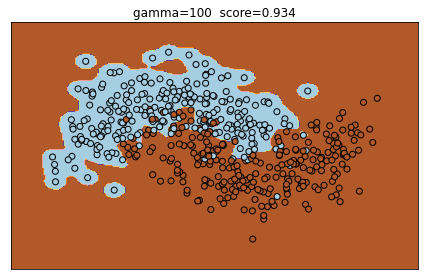

In [ ]:
# parametr gamam i kernel rbf

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=0)

gamma_values = [0.01, 0.1, 1, 5, 10, 100]

for g in gamma_values:
  svm_clf = SVC(kernel="rbf", C=0.001, gamma=g, random_state=10)
  svm_clf.fit(X, y)
  print("score ", svm_clf.score(X, y))
  ax = plot_dataset(X, X, y, y,clf = svm_clf, plot_test=False)
  plt.tight_layout()
  plt.title("gamma={}  score={}" .format(g, svm_clf.score(X, y)))
  plt.show()

In [ ]:
# Regresja i SVM

np.random.seed(2)
m = 50  # ilość punktów
X = 2 * np.random.rand(m, 1)
y = (3.1 + 4.2 * X + np.random.randn(m, 1)).ravel()

print("max x = ", X.max())
print("min x = ", X.min())
print("max y = ", y.max())
print("min y = ", y.min())

max x =  1.9291021601785103
min x =  0.051852463655782666
max y =  10.953834771274314
min y =  2.291122683009213


In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAB')
    plt.plot(X, y, "bo")


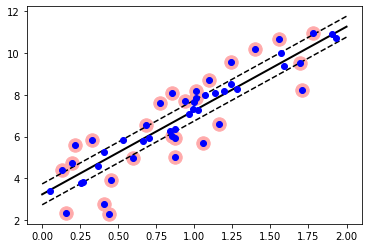

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=10)
svm_reg.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg, X, y)

plot_svm_regression(svm_reg, X, y, [0, 2, 2, 11])

In [ ]:
# przykład regresji nieliniowej i użycia polynomial kernel

np.random.seed(2)
m = 50  # ilość punktów
X = 2 * np.random.rand(m, 1)
y = (3.1*X + 4.2 * X*X + np.random.randn(m, 1)).ravel()

print("max x = ", X.max())
print("min x = ", X.min())
print("max y = ", y.max())
print("min y = ", y.min())

max x =  1.9291021601785103
min x =  0.051852463655782666
max y =  21.148238954902663
min y =  -0.8390679155480254


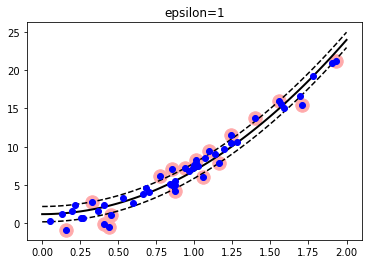

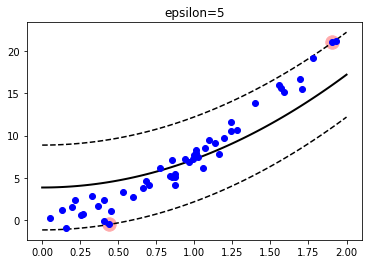

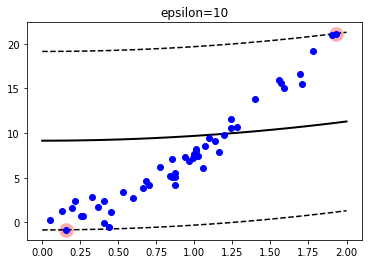

In [ ]:
from sklearn.svm import SVR

epsilon_values = [1,5,10]

for e in epsilon_values:
  svm_reg = SVR(epsilon=e, kernel="poly", degree=2)
  svm_reg.fit(X, y)

  def find_support_vectors(svm_reg, X, y):
      y_pred = svm_reg.predict(X)
      off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
      return np.argwhere(off_margin)

  plot_svm_regression(svm_reg, X, y, [0, 2, 2, 11])
  plt.title("epsilon=" + str(e))
  plt.show()